# CSE 578: Data Visualization Project
## Sahil Yogesh Hadke | shadke1@asu.edu | 1229679960

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read input

In [2]:
# Define the headers based on your provided structure
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv('./adult.data', header=None, names=headers) 

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Preprocessing

In [4]:
df = df.drop(['fnlwgt', 'education-num'], axis=1)

# ToDo: Remove ?

### Export to Excel for better understanding and exploring

In [5]:
df.to_csv("./data1.csv")

### User Story 1

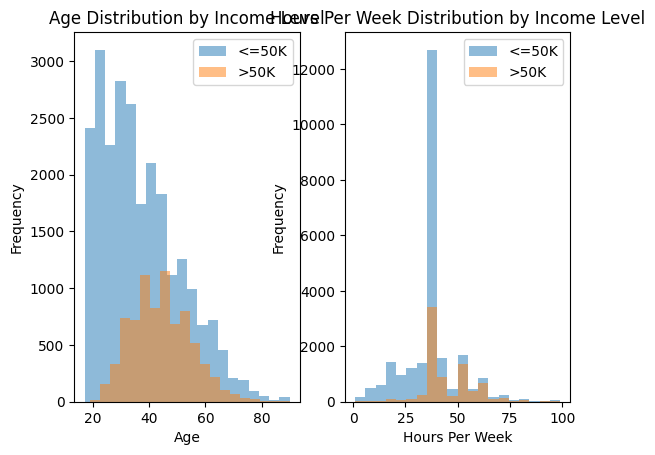

In [9]:
# Age Income Analysis
income_low = df[df['income'] == ' <=50K']
income_high = df[df['income'] == ' >50K']

# Create a figure and axis
fig, ax = plt.subplots(1,2)

# Plot the histograms for both income levels
ax[0].hist(income_low['age'], bins=20, alpha=0.5, label='<=50K')
ax[0].hist(income_high['age'], bins=20, alpha=0.5, label='>50K')

# Add labels and title
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Age Distribution by Income Level')
ax[0].legend()


# Plot the histograms for both income levels
ax[1].hist(income_low['hours-per-week'], bins=20, alpha=0.5, label='<=50K')
ax[1].hist(income_high['hours-per-week'], bins=20, alpha=0.5, label='>50K')

# Add labels and title
ax[1].set_xlabel('Hours Per Week')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Hours Per Week Distribution by Income Level')
ax[1].legend()


# Show the plot
plt.show()

### User Story 2

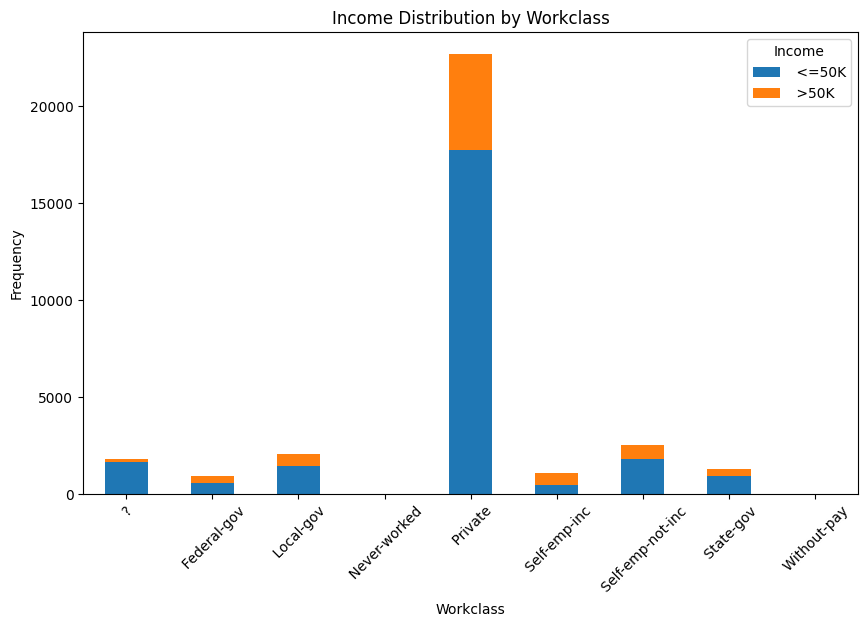

In [61]:
# Create a cross-tabulation of workclass and income
workclass_income_ct = pd.crosstab(df['workclass'], df['income'])

# Plotting
workclass_income_ct.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

### User Story 3

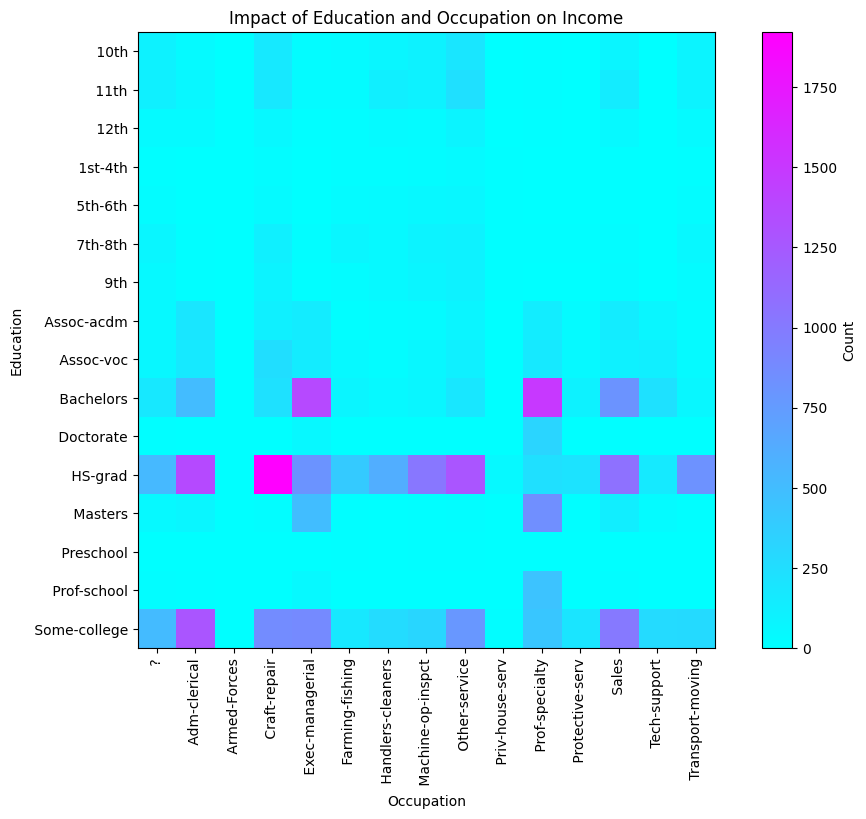

In [94]:
# Assuming your dataframe is named 'df'
df['income_num'] = df['income'].apply(convert_to_one)
pivot_table = df.pivot_table(index='education', columns='occupation', values='income', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='cool', interpolation='nearest')
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)
plt.colorbar(label='Count')
plt.xlabel('Occupation')
plt.ylabel('Education')
plt.title('Impact of Education and Occupation on Income')
plt.show()


In [87]:
# Convert income column to numerical format
def convert_to_one(x):
    # print('x is [{}]'.format(x.strip())) 
    # print(type(x))
    if(x.strip() == '<=50K'):
        # print('returned 1')
        return 1
    
    return 0
    
df['income_num'] = df['income'].apply(convert_to_one)
df['income_num'].unique()

#

# Calculate correlation between each attribute and income
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix[['income_num']].transpose(), cmap='coolwarm', vmin=-1, vmax=1)
plt.yticks([0], ['Income'])
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.colorbar(label='Correlation')
plt.title('Correlation of Attributes with Income')
plt.show()

ValueError: could not convert string to float: ' State-gov'